In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import datetime as dt
import scipy.stats as stats
# from urllib.request import urlretrieve
%matplotlib inline

In [2]:
# load in the dataframe
movie_data_to_load = "Output/new_movie_df_cleaned.csv"
new_movies_df = pd.read_csv(movie_data_to_load,index_col = 0)

### Film Dependency Check
* A metric for film "critical acclaim" is used in the analysis depends on (1)number of film reviews, (2)average film review score, and (3)time
* The analysis is restricted to only films released after 2005 in order to ensure that newer films are not systematically rated higher due to being released during the internet age (inflating the number of reviews for newer films)
* In order to assess whether or not restricting the analysis to films released after 2005 is an effective strategy, sucess is graphed relative to film age
* The graph does not show a clear relationship between film's critical acclaim and age in films released after 2005, so it appears that restricting the analysis to newer films is an appropriate strategy

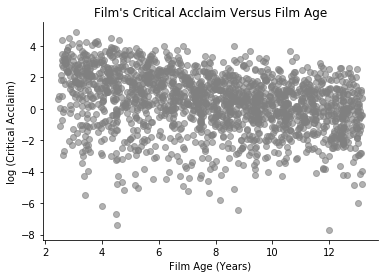

In [13]:
plt.scatter(new_movies_df["Years Out"],np.log(new_movies_df["Critical Acclaim"]),color="grey",alpha=0.6)
plt.xlabel("Film Age (Years)")
plt.ylabel("log (Critical Acclaim)")
plt.title("Film's Critical Acclaim Versus Film Age")
sns.despine()
plt.show()

### Do profitable movies tend to have higher or lower average reviews than unprofitable movies?

In [14]:
profitable_movies = new_movies_df[new_movies_df["Profitability"]=="Profitable"]
not_profitable_movies = new_movies_df[new_movies_df["Profitability"]=="Not Profitable"]

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


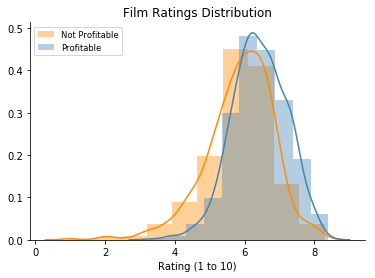

In [15]:
sns.distplot(not_profitable_movies["Average Vote"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["Average Vote"], color = "steelblue",label = "Profitable", bins = 10)
plt.title("Film Ratings Distribution")
plt.xlabel("Rating (1 to 10)")
plt.legend(fontsize="small", loc = "upper left")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


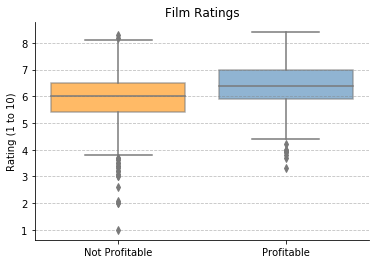

In [16]:
# create boxplot in Seaborn (change opacity in matplotlib)
ratings_boxplot=sns.boxplot(x="Profitability",y="Average Vote",data=new_movies_df, palette="coolwarm", order=["Not Profitable","Profitable"], boxprops=dict(alpha=0.6))
# change the facecolors to be consistent with the other charts
ratings_boxplot.artists[0].set_facecolor("darkorange")
ratings_boxplot.artists[1].set_facecolor("steelblue")

# chart labels and formatting
plt.axes().yaxis.grid(True,color="grey",linestyle="--",alpha=0.5)

sns.despine()
plt.xlabel("")
plt.ylabel("Rating (1 to 10)")
plt.title("Film Ratings")
# display the chart
plt.show()

In [17]:
# check variances -- profitable movies
{"Unprofitable Film Rating Standard Deviation":(np.std(not_profitable_movies["Average Vote"])),"Profitable Film Rating Standard Deviation":(np.std(profitable_movies["Average Vote"]))}

{'Unprofitable Film Rating Standard Deviation': 0.97482414860796,
 'Profitable Film Rating Standard Deviation': 0.7806651395700555}

In [18]:
# use T-test since variances are similar
stats.ttest_ind(not_profitable_movies["Average Vote"],profitable_movies["Average Vote"], axis=None, equal_var = True)

Ttest_indResult(statistic=-13.141468997014659, pvalue=9.316350019183919e-38)

In [19]:
# verify using Welch's test
stats.ttest_ind(not_profitable_movies["Average Vote"],profitable_movies["Average Vote"], axis=None, equal_var = False)

Ttest_indResult(statistic=-12.312227793124244, pvalue=1.0288103803785004e-32)

In [20]:
# both the t-test and Welch's test return statistically significant results. This means that the average profitable movie has higher rating than the average unprofitable movie

### Do profitable movies tend to have higher or lower budgets than unprofitable movies?

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


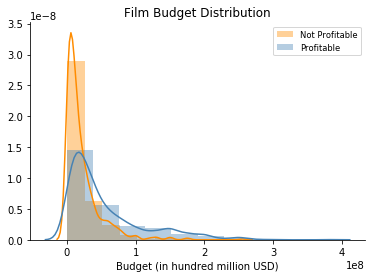

In [21]:
# make sure to add a note about how the budget data is actually right skewed
sns.distplot(not_profitable_movies["Budget"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["Budget"], color = "steelblue",label = "Profitable", bins = 10)
plt.title("Film Budget Distribution")
plt.xlabel("Budget (in hundred million USD)")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


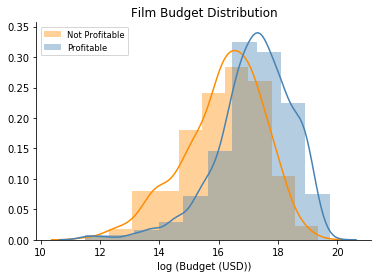

In [22]:
# make sure to add a note about how the budget data is actually right skewed
sns.distplot(not_profitable_movies["log Budget"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["log Budget"], color = "steelblue",label = "Profitable", bins = 10)
plt.title("Film Budget Distribution")
plt.xlabel("log (Budget (USD))")
plt.legend(fontsize="small", loc = "upper left")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


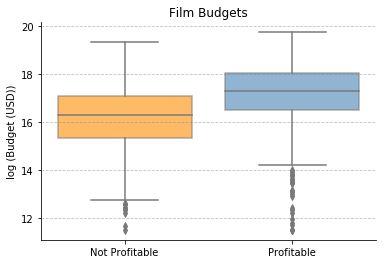

In [23]:
# make sure to add a note about how the budget data is actually right skewed

# create boxplot in Seaborn (change opacity in matplotlib)
budget_boxplot= sns.boxplot(x="Profitability",y="log Budget",data=new_movies_df,palette="coolwarm",order=["Not Profitable","Profitable"], boxprops=dict(alpha=0.6))
# change the facecolors to be consistent with the other charts
budget_boxplot.artists[0].set_facecolor("darkorange")
budget_boxplot.artists[1].set_facecolor("steelblue")
# add grid
plt.axes().yaxis.grid(True,color="grey",linestyle="--",alpha=0.5)
# chart labels and formatting
sns.despine()
plt.xlabel("")
plt.ylabel("log (Budget (USD))")
plt.title("Film Budgets")
# display the chart
plt.show()

In [24]:
# check variances of log (Budget) for both unprofitable films
{"Unprofitable Film Budget Standard Deviation":(np.std(not_profitable_movies["log Budget"])),"Profitable Film Budget Standard Deviation":(np.std(profitable_movies["log Budget"]))}

{'Unprofitable Film Budget Standard Deviation': 1.3563021710575953,
 'Profitable Film Budget Standard Deviation': 1.2911191097939394}

In [25]:
# use T-test since variances are similar
stats.ttest_ind(not_profitable_movies["log Budget"],profitable_movies["log Budget"], axis=None, equal_var = True)

Ttest_indResult(statistic=-15.954275864734552, pvalue=9.618335729783545e-54)

In [26]:
# verify using Welch's test
stats.ttest_ind(not_profitable_movies["log Budget"],profitable_movies["log Budget"], axis=None, equal_var = False)

Ttest_indResult(statistic=-15.720808229923335, pvalue=5.475089079072883e-51)

In [27]:
# both the t-test and Welch's test return statistically significant results. This means that the average profitable movie a larger budget than the average unprofitable movie

### Budget Relative to Film's Critical Acclaim

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


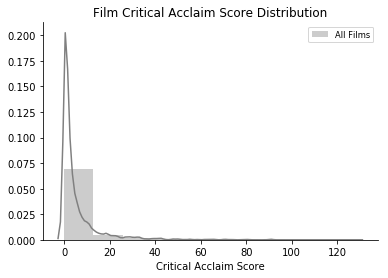

In [39]:
# Below, a distribution plot of both the profitable and not profitable movies is shown for film critical acclaim score
sns.distplot(new_movies_df["Critical Acclaim"], color = "grey", label = "All Films", bins = 10)
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


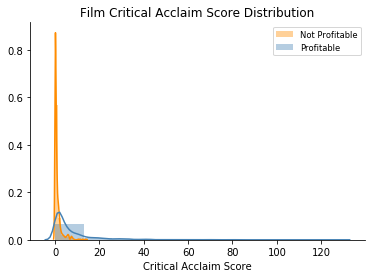

In [33]:
# We already established that film budget is right skewed and is suited towards a logarithmic analysis
# We now assess whether the film's critical acclaim score skewed
# Below, a distribution plot of both the profitable and not profitable movies is shown for film critical acclaim score
sns.distplot(not_profitable_movies["Critical Acclaim"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["Critical Acclaim"], color = "steelblue",label = "Profitable", bins = 10)
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


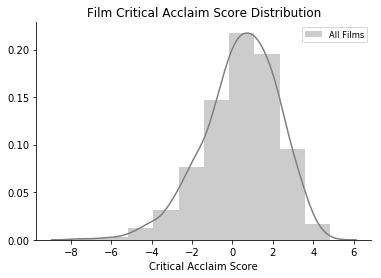

In [40]:
# Below, a distribution plot of both the profitable and not profitable movies is shown for film critical acclaim score
sns.distplot(new_movies_df["log Critical Acclaim"], color = "grey", label = "All Films", bins = 10)
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


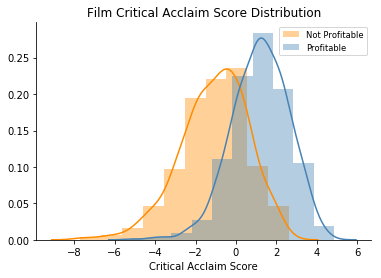

In [34]:
# Below, a distribution plot of both the profitable and not profitable movies is shown for log of film critical acclaim score
sns.distplot(not_profitable_movies["log Critical Acclaim"], color = "darkorange", label = "Not Profitable", bins = 10)
sns.distplot(profitable_movies["log Critical Acclaim"], color = "steelblue",label = "Profitable", bins = 10)
plt.title("Film Critical Acclaim Score Distribution")
plt.xlabel("Critical Acclaim Score")
plt.legend(fontsize="small", loc = "upper right")
sns.despine()
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


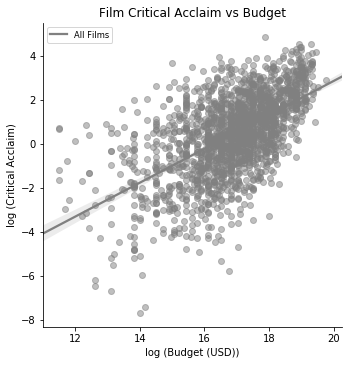

In [67]:
sns.lmplot(x="log Budget", y="log Critical Acclaim",data=new_movies_df,legend=True,scatter_kws={'alpha':0.5,"color":"grey","label":"All Films"},line_kws={"color":"grey","label":"All Films"})
plt.xlabel("log (Budget (USD))")
plt.ylabel("log (Critical Acclaim)")
plt.title("Film Critical Acclaim vs Budget")
plt.legend(fontsize="small", loc = "upper left")
plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


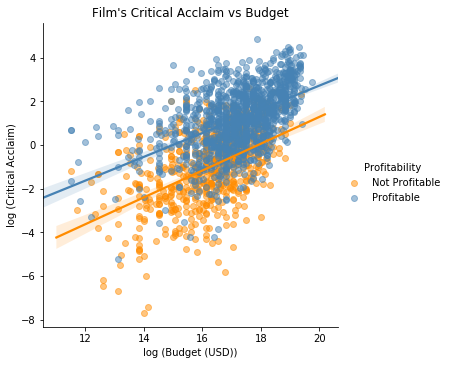

In [57]:
sns.lmplot(x="log Budget", y="log Critical Acclaim",hue = "Profitability",data=new_movies_df,scatter_kws={'alpha':0.5},hue_order=["Not Profitable","Profitable"],palette={"Not Profitable" : "darkorange","Profitable" : "steelblue"})
plt.xlabel("log (Budget (USD))")
plt.ylabel("log (Critical Acclaim)")
plt.title("Film's Critical Acclaim vs Budget")
plt.show()